In [ ]:
# I will analyse the "heart attack" dataset using Principle Components Analysis (PCA)
# This is also the data set used for my personal MSc graduation project, I expect to get to understand more about the meaning behind the data,
# as well as the important features to choose for my model in the final project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
#The data used can be accessed via: 'https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset'

In [5]:
heart_df= pd.read_csv("heart.csv")
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# The data has 14 features: 
# age: The person's age (years)
# sex: The person's gender (1: male, 0: female)
# cp: Type of chest pain 
# trtbps: Resting blood pressure (mm/Hg when first arrive in the hospital)
# chol: Cholesterol measurement (mg/dl - milligrams per decilitre)
# fbs: Fasting blood sugar (1: true, 0: false if it's higher than 120 mg/dl)
# restecg: Resting electrocardiogram(0: normal, 1: ST-T wave abnormality, 2: sign of left ventricular hypertrophy)
# thalachh: Maximum heart rate recorded 
# exng: Having symptoms of induced angina (1: Yes, 0: No)
# oldpeak: ST-depression induced by resting behaviour
# slp: The slope of ST segment's peak exercise (1: upsloping, 2: flat, 3: downsloping)
# caa: Main vessels' quantity
# thall: Beta thalassemia (1: no blood flow in some part of the heart, 2: normal blood flow, 3: reversible defect)
# output: The person has heart disease or not (1: yes, 0: no)

In [7]:
heart_df.info() #Check for the null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# The data has numerical dimensions and no null values
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_df.isna().sum() #Check for the null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
heart_df.duplicated().sum() #Check for duplicates 

1

In [11]:
heart_df.drop_duplicates(inplace=True) #Drop duplicates
print("Duplicates:", heart_df.duplicated().sum())

Duplicates: 0


<AxesSubplot:>

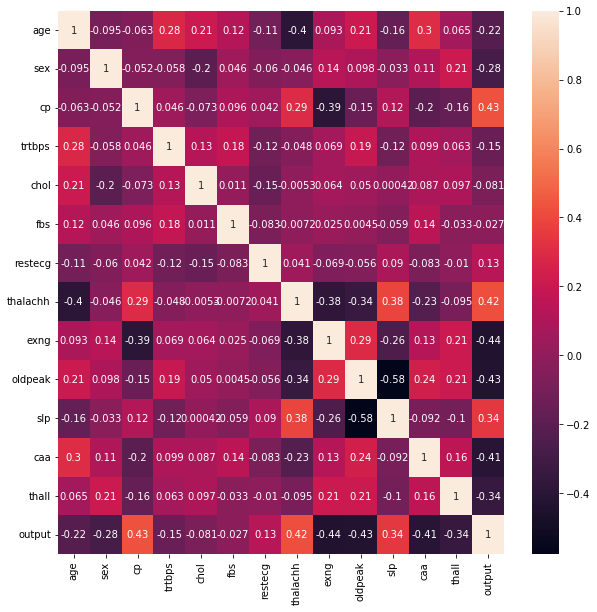

In [12]:
# Let's see the correlation of the features
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(), annot=True)

In [13]:
# From the heatmap, we can see that the thalachh and cp, slp seem to be highly related to heart disease
# If we take the literal diagnosis of a heart attack presence, high cholesterol, high blood pressure, diabetes and living habits such as
# smoking, alcohol abuse and unhealthy diet are also major factors.

In [14]:
# Create the list for numerical features
num_features = list(set(['age','trtbps','thalachh','chol','oldpeak']))
num_features.sort()
num_features

['age', 'chol', 'oldpeak', 'thalachh', 'trtbps']

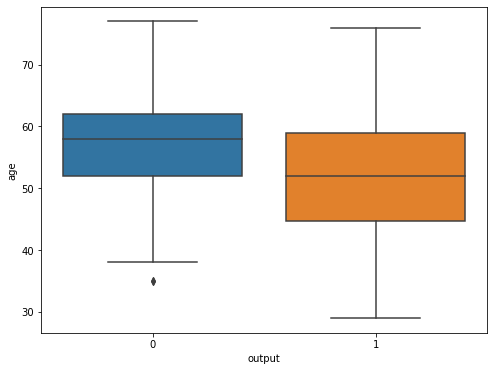

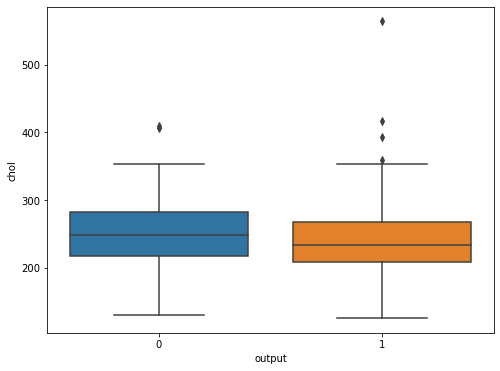

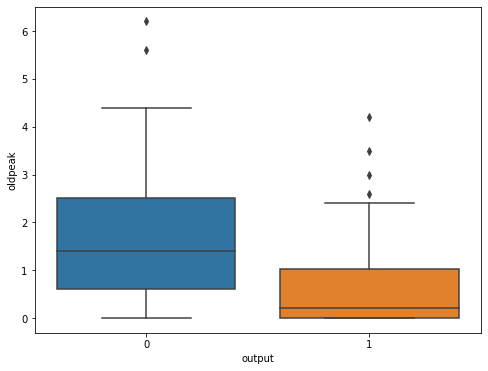

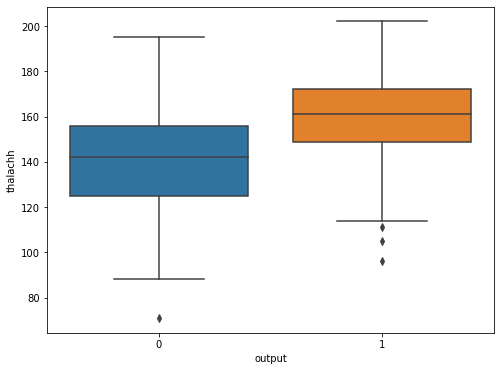

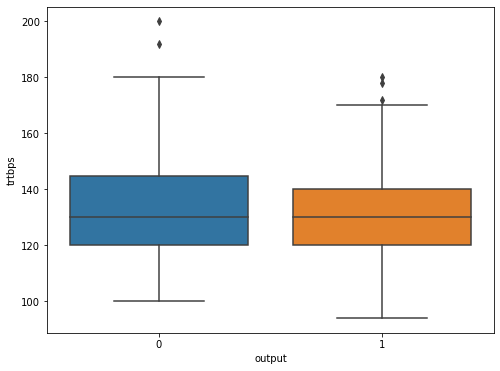

In [15]:
# Let's check the relation of these num_features to the output
for i in range(len(num_features)):
    f = num_features[i]
    plt.figure(figsize = (8, 6))
    sns.boxplot(x='output',y=num_features[i],data=heart_df);


In [16]:
# Just look at the boxplot, it seems that trtbps and chol have the same mean for output of 0 and 1, just to make sure, i will 
# compare their individual p-value using ttest_ind
for f in num_features:
    print('Ttest_ind for:',f)
    
    statt,p = stats.ttest_ind(heart_df[f][heart_df['output'] == 0],
                    heart_df[f][heart_df['output'] == 1])
    
    if p < 0.05:
        result="Mean value of the output is different"  
    else:
        result="Mean value of the output is the same"  
    print('P-value is' + str(p) + "\n" + str(result) + "\n")
    




Ttest_ind for: age
P-value is0.00010394837285416688
 Mean value of the output is different 



Ttest_ind for: chol
P-value is0.15803697464249714
 Mean value of the output is the same 



Ttest_ind for: oldpeak
P-value is5.814566948031283e-15
 Mean value of the output is different 



Ttest_ind for: thalachh
P-value is2.4761460479234722e-14
 Mean value of the output is different 



Ttest_ind for: trtbps
P-value is0.010926538861949147
 Mean value of the output is different 



In [17]:
# My assumption for the resting heart beat is wrong, only the mean of the cholesterol for 2 condition of the output is equal.
# However, there is not enough proof to remove any of the features, let's check the categorical values.
# Create the list for categorical features
cat_features = list(set(['caa', 'cp', 'exng', 'fbs', 'restecg', 'sex', 'slp', 'thall']))
cat_features.sort()
cat_features

['caa', 'cp', 'exng', 'fbs', 'restecg', 'sex', 'slp', 'thall']

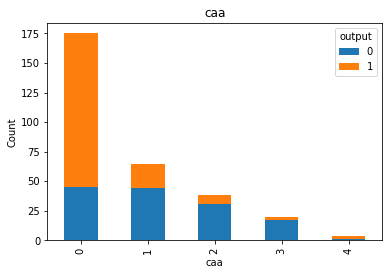

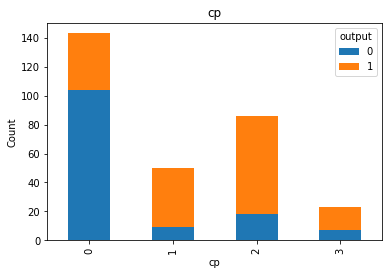

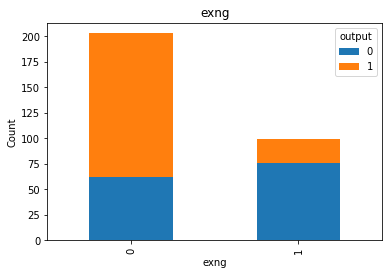

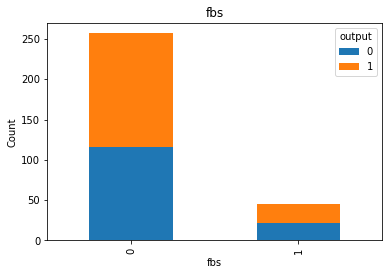

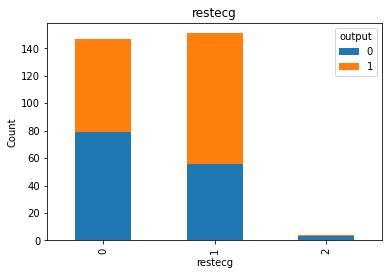

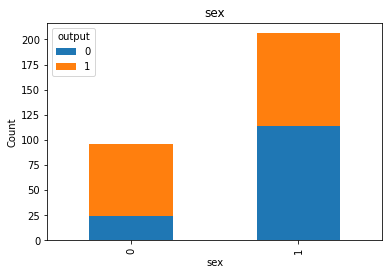

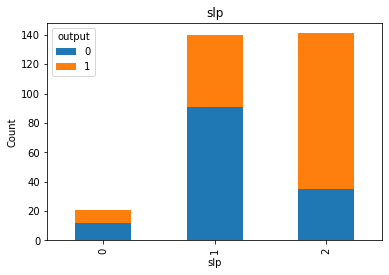

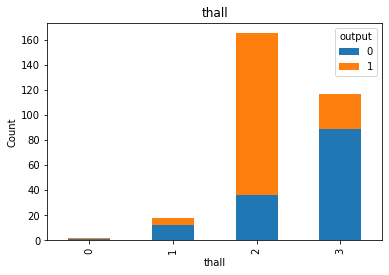

In [18]:
# Use bar plot
for f in cat_features:
    counts = heart_df.groupby([f, 'output']).size().unstack()
    counts.plot(kind='bar', stacked=True)
    plt.title(f)
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.show()

In [19]:
# ca: The more major vessels you have, the more likely you will not have heart diseases
# cp: Type 2 is the most severe type of chestpain
# exng: It's less likely to have heart diseases if you have more exng
# fbs: It's not clear to see if fbs is connected to heart diseases or not
# restecg: Type 1 of ecg type is the most relatable with heart diseases and type 3 is with the least possibility.
# sex: Both male and female can equally have heart diseases
# slp: Slope 2 is highly relating to heart diseases
# thall: Type 2 definitely leaning toward heart disease and type 0 is having the least possibility.

In [20]:
# As we have more than 2 categorical variables so i will use chi_square test
from scipy.stats import chi2_contingency

for col in cat_features:
    data_crosstable = pd.crosstab(heart_df['output'], heart_df[col],)
    print(data_crosstable)
    c, p, dof, expected = chi2_contingency(data_crosstable)
    if p < 0.05:
        print("There is a significant correlation between these variables \n")
    else:
        print('P-value is' + str(p) +"\n",'chi2 value is' + str(c) + "\n" + "There is no association for these two" + "\n")

caa       0   1   2   3  4
output                    
0        45  44  31  17  1
1       130  21   7   3  3
There is a significant correlation between these variables 

cp        0   1   2   3
output                 
0       104   9  18   7
1        39  41  68  16
There is a significant correlation between these variables 

exng      0   1
output         
0        62  76
1       141  23
There is a significant correlation between these variables 

fbs       0   1
output         
0       116  22
1       141  23
P-value is0.7611374700928197
 chi2 value is 0.09240835568001493 
There is no association for these two

restecg   0   1  2
output            
0        79  56  3
1        68  95  1
There is a significant correlation between these variables 

sex      0    1
output         
0       24  114
1       72   92
There is a significant correlation between these variables 

slp      0   1    2
output             
0       12  91   35
1        9  49  106
There is a significant correlation betw

In [21]:
# As fbs has no association, we will remove this feature
heart_df = heart_df.drop(['fbs'], axis = 1)
heart_df.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


In [22]:
heart_df.shape

(302, 13)

In [23]:
# Let's standardise the data before using PCA
std_scaler = StandardScaler()

columns = list(num_features)
heart_df[columns] = std_scaler.fit_transform(heart_df[columns])

heart_df

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,0.764066,-0.261285,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,1,0.587366,1,-0.382092,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0,0.478910,-0.106449,1,-1.161988,1,-0.727060,1,0,3,0
299,-1.042904,1,3,-1.232023,0.338703,1,-0.768384,0,0.135360,1,0,3,0
300,1.503322,1,0,0.707035,-1.035462,1,-0.374779,0,2.032684,1,2,3,0
301,0.285561,1,0,-0.091401,-2.235438,1,-1.511859,1,0.135360,1,1,3,0


In [24]:
# Split the data 
from sklearn.model_selection import train_test_split

X = heart_df.drop(columns = 'output', axis=1)
y = heart_df['output']

# Create the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

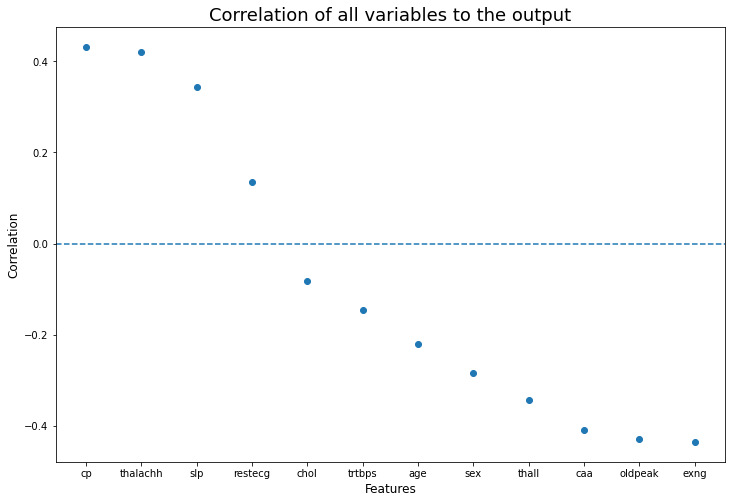

In [25]:
# Let's determine multicolinearity.
X = heart_df.drop(['output'], axis=1)
corr = X.corrwith(heart_df['output'])
corr_df = pd.DataFrame({'feature': corr.index, 'corr': corr.values})
corr_df = corr_df.sort_values(by='corr', ascending=False)

plt.figure(figsize=(12, 8))
plt.scatter(x=corr_df['feature'], y=corr_df['corr'])
plt.axhline(linestyle='--')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title("Correlation of all variables to the output", fontsize=18)
plt.show()

In [29]:
# From the above plot, chol,trtbps,restecg are having less correlation with heart disease
std_scaler_x = std_scaler.fit_transform(X)

# Create a PCA's object and fit it
pca = PCA()
X_pca = pca.fit(X)
pca_x = pca.fit_transform(std_scaler_x)

# Now lets examine the variance percentage of all PCA components to decide on the dimensional reduction
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=2)*100)
variance

array([23., 35., 45., 54., 62., 70., 77., 83., 88., 92., 96., 99.])

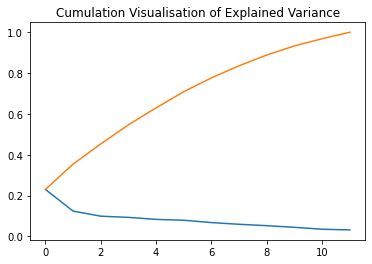

In [31]:
# Visualising the array above
plt.plot(range(12), pca.explained_variance_ratio_)
plt.plot(range(12), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulation Visualisation of Explained Variance")
plt.show()

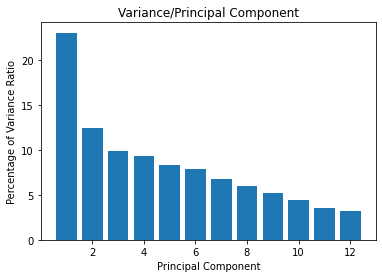

In [28]:
# Storing the variance values and prepare for plotting
var_pca = pca.explained_variance_ratio_ * 100
x_values = range(1, len(var_pca) + 1)

# Creating a bar plot 
plt.bar(x_values, var_pca, alpha=1)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Ratio')
plt.title('Variance/Principal Component')
plt.show()

In [ ]:
# PCA 10 onwards seem to have less variance compared to the rest
# PCA 1 has the highest variance (more than 25%)

In [32]:
# Perform LogisticRegression on the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pca_x, y, test_size = .2, random_state = 80)
lr = LogisticRegressionCV()
lr.fit(x_train,y_train)
print(f"Train accuracy is: {lr.score(x_train,y_train)}")
print(f"Test accuracy is: {lr.score(x_test,y_test)}")

Train accuracy is: 0.8298755186721992
Test accuracy is: 0.8360655737704918


In [33]:
# Let's see if we can have a higher accuracy by dropping more unrelated values.
# From the stack barplot for the categorical features, I will remove sex,restecg,thall, exng since the values against the output for these 
# two are slightly the same.
# Create another df
heart_df_2 = heart_df.drop(['sex','restecg', 'thall', 'exng'], axis = 1)
heart_df_2.head()

,age,cp,trtbps,chol,thalachh,oldpeak,slp,caa,output
0,0.949794,3,0.764066,-0.261285,0.018826,1.084022,0,0,1
1,-1.928548,2,-0.091401,0.067741,1.636979,2.118926,0,0,1
2,-1.485726,1,-0.091401,-0.822564,0.980971,0.307844,2,0,1
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,2,0,1
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,2,0,1


In [34]:
std_scaler_2 = StandardScaler()

columns_2 = list(num_features)
heart_df_2[columns_2] = std_scaler_2.fit_transform(heart_df_2[columns_2])

heart_df_2

,age,cp,trtbps,chol,thalachh,oldpeak,slp,caa,output
0,0.949794,3,0.764066,-0.261285,0.018826,1.084022,0,0,1
1,-1.928548,2,-0.091401,0.067741,1.636979,2.118926,0,0,1
2,-1.485726,1,-0.091401,-0.822564,0.980971,0.307844,2,0,1
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,2,0,1
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,2,0,1
...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0.478910,-0.106449,-1.161988,-0.727060,1,0,0
299,-1.042904,3,-1.232023,0.338703,-0.768384,0.135360,1,0,0
300,1.503322,0,0.707035,-1.035462,-0.374779,2.032684,1,2,0
301,0.285561,0,-0.091401,-2.235438,-1.511859,0.135360,1,1,0


In [35]:
# Split the data 
X2 = heart_df_2.drop(columns = 'output', axis=1)
y2 = heart_df_2['output']

# Create the test and train data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=100, test_size=0.20)

In [36]:
std_scaler_x_2 = std_scaler_2.fit_transform(X)

# Create a PCA's object and fit it
pca_2 = PCA()
pca_x_2 = pca_2.fit_transform(std_scaler_x_2)

In [37]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(pca_x_2, y2, test_size = .2, random_state = 80)
lr_2 = LogisticRegressionCV()
lr_2.fit(x_train_2,y_train_2)
print(f"Train accuracy is: {lr_2.score(x_train_2,y_train_2)}")
print(f"Test accuracy is: {lr_2.score(x_test_2,y_test_2)}")

Train accuracy is: 0.8298755186721992
Test accuracy is: 0.8360655737704918


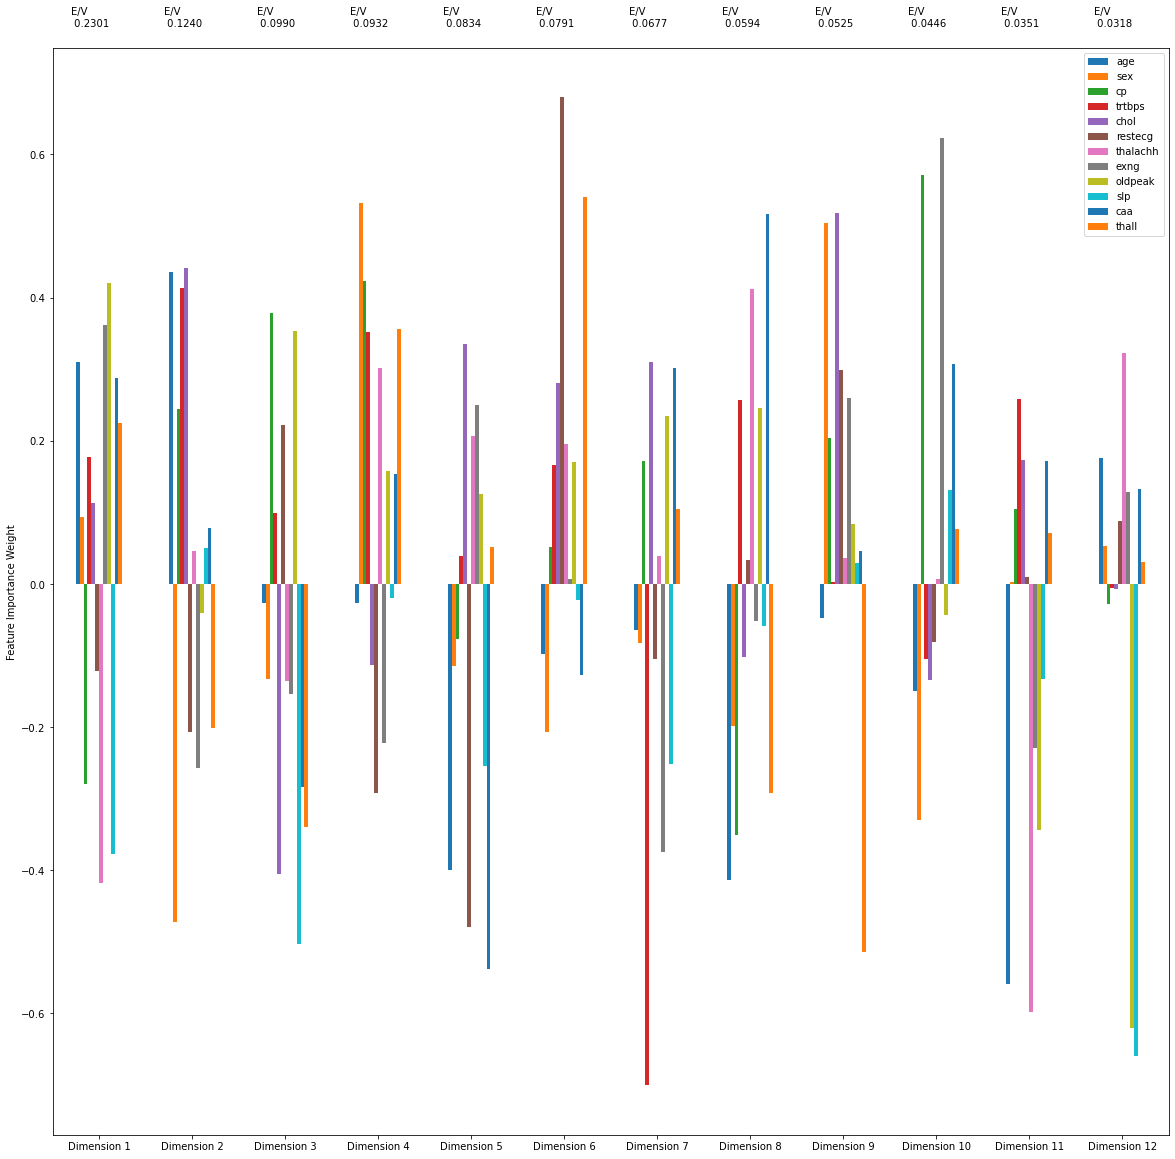

In [77]:
# As mentioned, we already know that the PCA components from 1 to 10 are performing well for the result.Let's create a function 
# that can visualise the weight of each individual PCA components. By doing this, we will know the importance of features' work 
# to the target.


def pca_vis(inp, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Create an index for each dimension using the format "Dimension i"
    dim = ["Dimension {}".format(i) for i in range(1, len(pca.components_) + 1)]
        
    # Create a DataFrame that contains the weights of each feature for each dimension.
    components = pd.DataFrame(np.round(pca.components_, 4), columns=inp.columns)

    # Create a DataFrame for the explained variance ratios.
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=["E/V"])

    # Create a bar plot of the feature weights as a function of the components.
    fig, ax = plt.subplots(figsize=(20, 20))
    components.plot(kind="bar", ax=ax)
    ax.set_ylabel("Feature Importance Weight")
    ax.set_xticklabels(dim, rotation=0)

    # Display the explained variance ratios.
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i - 0.30, ax.get_ylim()[1] + 0.03, "E/V\n {:.4f}".format(ev))

    # Concatenate the explained variance ratios and the feature weights for each dimension into a single DataFrame.
    pca_df = pd.concat([variance_ratios, components], axis=1)

    # Return the concatenated DataFrame.
    return pca_df
pca_vis = pca_vis(X, pca)

In [ ]:
# With PCA, we have achieved a model with 80% of accuracy. Since PCA components 10, 11, 12 have low explained variance, we can opt them
# out and this is dimensionality reduction for this dataset. 

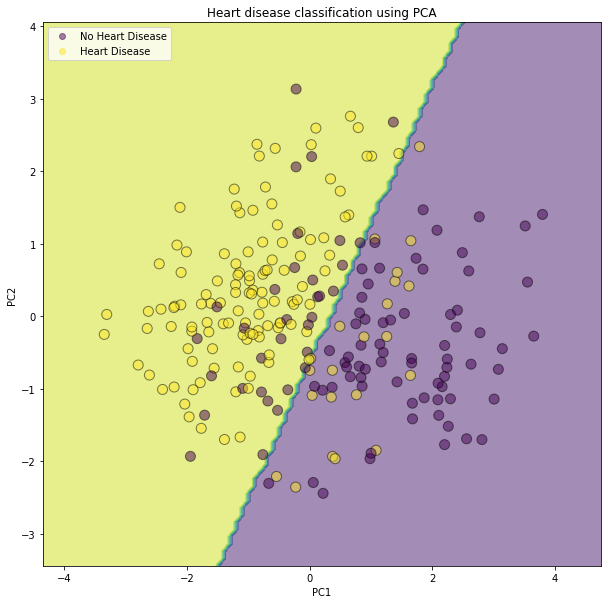

In [94]:
X_train_pca = pca.fit_transform(X_train)

pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]
lr.fit(np.column_stack((pc1, pc2)), y_train) 

# Now create a matrix of points so that we can put all PCA points inside of it (start from the min value of pc1 - 1, and ends
# at the max value of pc1 + 1, with the step size of 0.1. This ensures that even if the actually min and max values of the
# variables are all covered by the meshgrid) 
xx, yy = np.meshgrid(np.arange(start=pc1.min() - 1, stop=pc1.max() + 1, step=0.1),
                     np.arange(start= pc2.min() - 1, stop=pc2.max() + 1, step=0.1))

# Let's separate the points to 1 and 0 
Z = lr.predict(np.column_stack((xx.ravel(), yy.ravel()))) 

# Using reshape to match classification to a point in the matrix
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

# The predicted classifications in the model will fill in the contour
ax.contourf(xx, yy, Z, alpha=0.5)  
scatter = ax.scatter(pc1, pc2, c=y_train, s=100, alpha=0.5, edgecolors='k')

#now create a legend and axis's names
legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1],loc="upper left")
legend.get_texts()[0].set_text("No Heart Disease")
legend.get_texts()[1].set_text("Heart Disease")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Heart disease classification using PCA')
plt.show()